SMS SPAM Classification
Download the dataset "spam.csv"
Import required library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Read the Dataset

In [29]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Preprocessing the Dataset

In [30]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [34]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

Create Model & Add Layers

In [35]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129 


Compile the Model

In [37]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])


Fit the Model

In [38]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,
          validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 34s 190ms/step - loss: 0.1980 - accuracy: 0.9354 - val_loss: 0.0649 - val_accuracy: 0.9821
Epoch 2/15
168/168 [==============================] - 31s 185ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0513 - val_accuracy: 0.9868
Epoch 3/15
168/168 [==============================] - 31s 186ms/step - loss: 0.0217 - accuracy: 0.9946 - val_loss: 0.0613 - val_accuracy: 0.9868
Epoch 4/15
168/168 [==============================] - 33s 198ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0779 - val_accuracy: 0.9797
Epoch 5/15
168/168 [==============================] - 32s 188ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0661 - val_accuracy: 0.9821
Epoch 6/15
168/168 [==============================] - 32s 190ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0772 - val_accuracy: 0.9868
Epoch 7/15
168/168 [==============================] - 32s 192ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0811 - val_ac

In [39]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

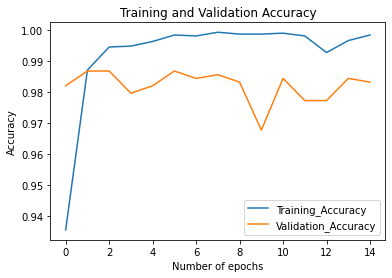

In [40]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'Accuracy')

Save the Model

In [41]:
model.save('Spam_sms_classifier.h5')

Test the Model

In [42]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [43]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 4s 82ms/step - loss: 0.1061 - accuracy: 0.9828


In [44]:
print(' loss: {:0.4f}'.format(accuracy1[0]))
print(' Accuracy: {:0.4f}'.format(accuracy1[1]))

 loss: 0.1061
 Accuracy: 0.9828
